#### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\Vibhishan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
os.chdir("D:\CDAC\Machine Learning\Lead Score")
df = pd.read_csv('Leads.csv')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Exploratory Data Analysis

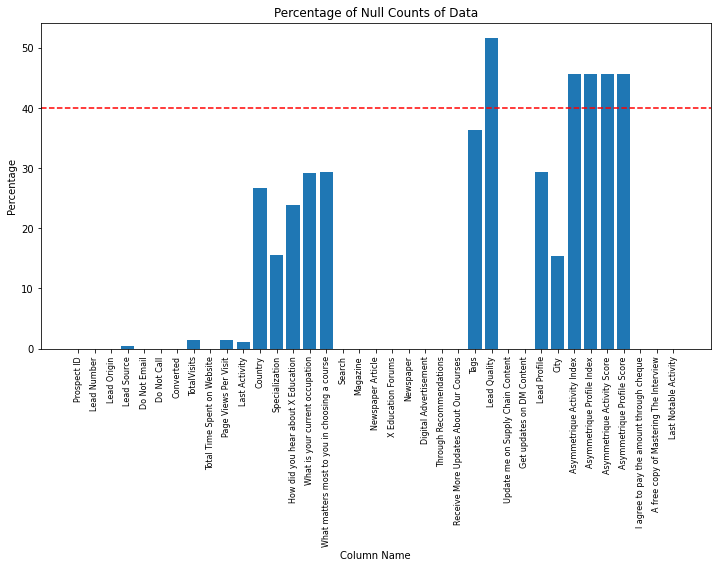

In [7]:
plt.figure(figsize=(12, 6))  
x_values = range(len(df.columns))
plt.bar(x_values, (df.isnull().sum()) * 100 / df.shape[0])
plt.xticks(x_values, df.columns, rotation=90, fontsize=8)
plt.axhline(40, ls='--', color='red')

plt.xlabel('Column Name')
plt.ylabel('Percentage')
plt.title('Percentage of Null Counts of Data')

plt.show()

#### Dropping columns having more than 40% of null values

In [8]:
cols = df.columns

for i in cols:
    if ((100*(df[i].isnull().sum())/len(df.index))>=40):
        df.drop(i,1,inplace=True)

In [9]:
# After droping columns
df.shape

(9240, 32)

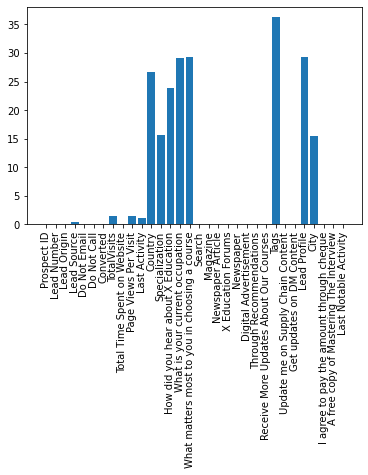

In [10]:
plt.bar(df.columns,(df.isnull().sum()/df.shape[0])*100)
plt.xticks(rotation=90)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Lets check null values 

In [12]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

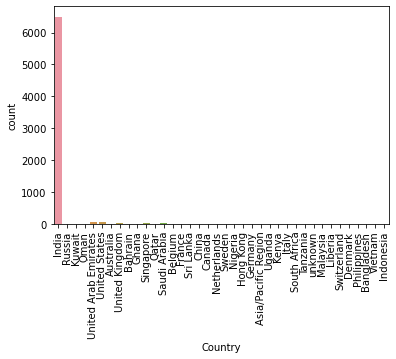

In [13]:
sns.countplot(df['Country'])
plt.xticks(rotation=90)
plt.show()

In [14]:
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

#### As it contains more than 95% of data of India so we can drop that column

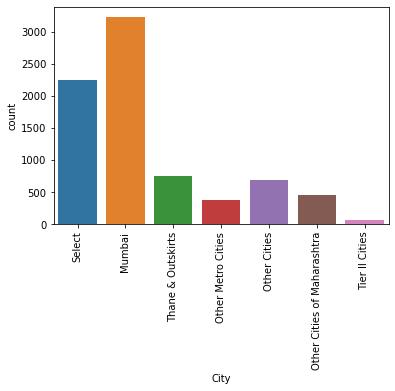

In [15]:
sns.countplot(df['City'])
plt.xticks(rotation=90)
plt.show()

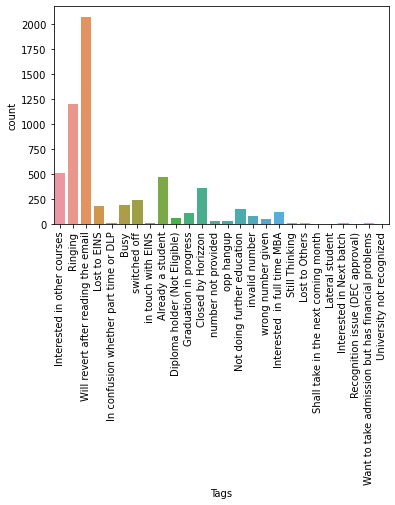

In [16]:
sns.countplot(df['Tags'])
plt.xticks(rotation=90)
plt.show()

In [17]:
#checking value counts of Tag variable
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

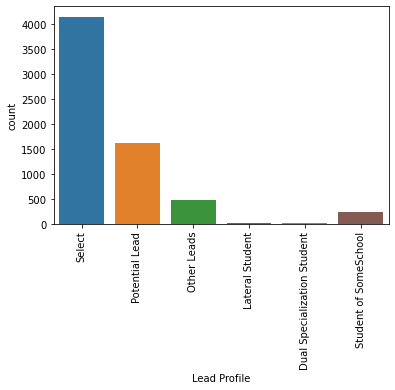

In [18]:
sns.countplot(df['Lead Profile'])
plt.xticks(rotation=90)
plt.show()

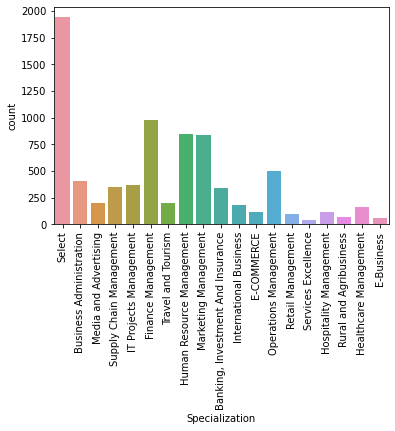

In [19]:
sns.countplot(df['Specialization'])
plt.xticks(rotation=90)
plt.show()

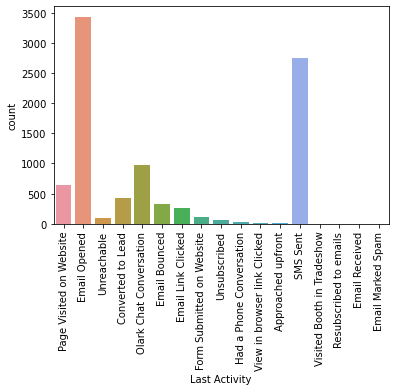

In [20]:
sns.countplot(df['Last Activity'])
plt.xticks(rotation=90)
plt.show()

In [21]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

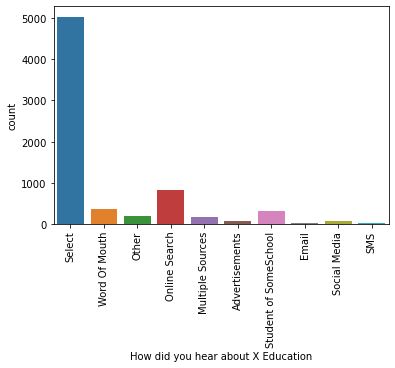

In [22]:
sns.countplot(df['How did you hear about X Education'])
plt.xticks(rotation=90)
plt.show()

#### We can drop this column as it contains Select type more which is not usefull

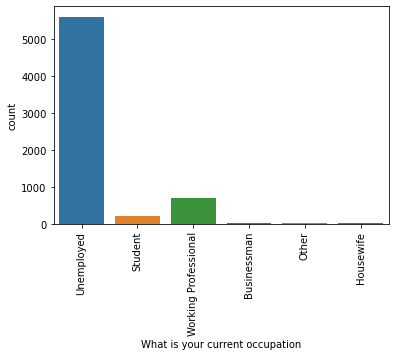

In [23]:
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [24]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

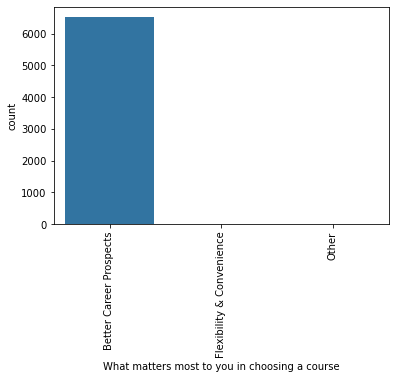

In [25]:
sns.countplot(df['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [26]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

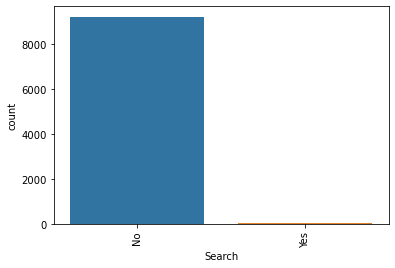

In [27]:
sns.countplot(df['Search'])
plt.xticks(rotation=90)
plt.show()

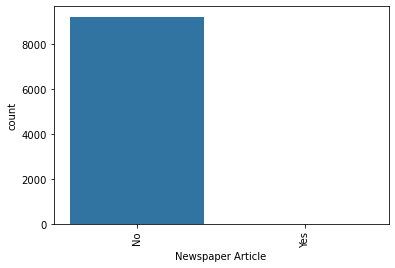

In [28]:
sns.countplot(df['Newspaper Article'])
plt.xticks(rotation=90)
plt.show()

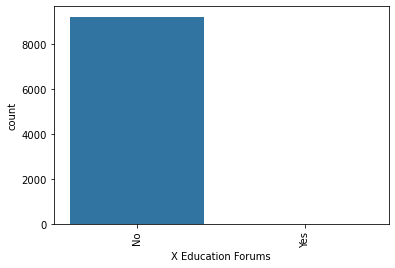

In [29]:
sns.countplot(df['X Education Forums'])
plt.xticks(rotation=90)
plt.show()

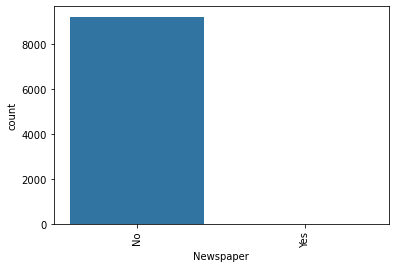

In [30]:
sns.countplot(df['Newspaper'])
plt.xticks(rotation=90)
plt.show()

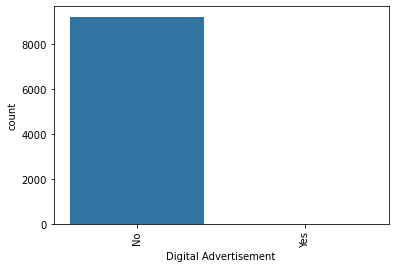

In [31]:
sns.countplot(df['Digital Advertisement'])
plt.xticks(rotation=90)
plt.show()

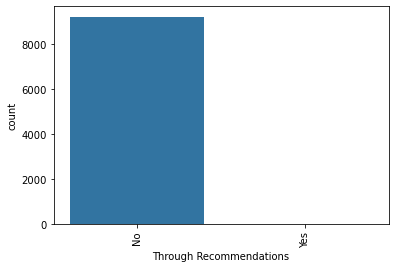

In [32]:
sns.countplot(df['Through Recommendations'])
plt.xticks(rotation=90)
plt.show()

In [33]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

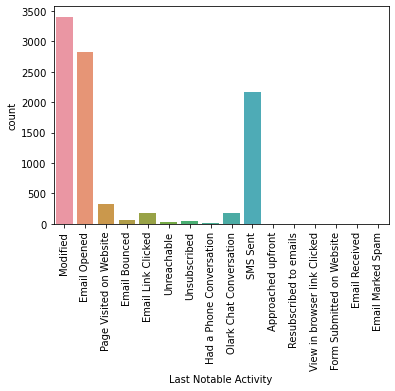

In [34]:
sns.countplot(df['Last Notable Activity'])
plt.xticks(rotation=90)
plt.show()

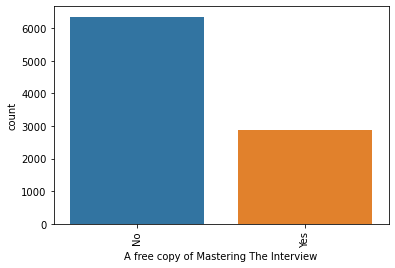

In [35]:
sns.countplot(df['A free copy of Mastering The Interview'])
plt.xticks(rotation=90)
plt.show()

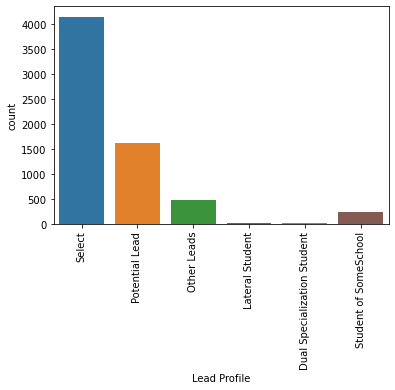

In [36]:
sns.countplot(df['Lead Profile'])
plt.xticks(rotation=90)
plt.show()

#### On the basis of values columns contains imbalance data is dropped 

In [37]:
# creating list of columns to be dropped, we also dont require prospect_id and lead number as they contaning unique value which will not helpfull for prediction model
df1 = df.drop(df[['Country','Prospect ID','How did you hear about X Education','Search','Magazine','Newspaper Article',
                  'X Education Forums','Newspaper','Digital Advertisement','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','I agree to pay the amount through cheque'
               ,'Get updates on DM Content','Lead Profile']],axis=1)

#### Converting object column to categorical column

In [38]:
#Converting Categorical columns from Object to categorical 
Catgorical_col = ['Lead Source','Last Activity','Specialization','What is your current occupation',
                 'What matters most to you in choosing a course','Through Recommendations','Tags',
                  'City','A free copy of Mastering The Interview',
                  'Last Notable Activity','Do Not Email','Do Not Call','Lead Origin' ]
for col in Catgorical_col:
#     df1[col] =pd.Categorical(df1[col])
    df1[col] =df1[col].astype('category')  

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Number                                    9240 non-null   int64   
 1   Lead Origin                                    9240 non-null   category
 2   Lead Source                                    9204 non-null   category
 3   Do Not Email                                   9240 non-null   category
 4   Do Not Call                                    9240 non-null   category
 5   Converted                                      9240 non-null   int64   
 6   TotalVisits                                    9103 non-null   float64 
 7   Total Time Spent on Website                    9240 non-null   int64   
 8   Page Views Per Visit                           9103 non-null   float64 
 9   Last Activity                            

In [40]:
df1.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Through Recommendations                             0
Tags                                             3353
City                                             1420
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [41]:
df1['City']=df1['City'].replace('Select','Unknown',)

from sklearn.impute import SimpleImputer
imputer_var = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="Unknown")
df1['City'] = imputer_var.fit_transform(df1[['City']])

In [42]:
df1['City'].value_counts()

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [43]:
# df1['Tags']=df1['Tags'].replace('Select','Unknown',)

from sklearn.impute import SimpleImputer
imputer_var = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="Unknown")
df1['Tags'] = imputer_var.fit_transform(df1[['Tags']])

In [44]:
df1['Tags'].value_counts()

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [45]:
# df1['Tags']=df1['Tags'].replace('Select','Unknown',)

from sklearn.impute import SimpleImputer
imputer_var = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="Unknown")
df1['What matters most to you in choosing a course'] = imputer_var.fit_transform(df1[['What matters most to you in choosing a course']])

In [46]:
df1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Unknown                      2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [47]:
# df1['Tags']=df1['Tags'].replace('Select','Unknown',)

from sklearn.impute import SimpleImputer
imputer_var = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="Unknown")
df1['What is your current occupation'] = imputer_var.fit_transform(df1[['What is your current occupation']])

In [48]:
df1['What is your current occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [49]:
df1['Specialization']=df1['Specialization'].replace('Select','Unknown')

from sklearn.impute import SimpleImputer
imputer_var = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="Unknown")
df1['Specialization'] = imputer_var.fit_transform(df1[['Specialization']])

In [50]:
df1['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [51]:
# df1['Specialization']=df1['Specialization'].replace('Select','Unknown')

from sklearn.impute import SimpleImputer
imputer_var = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df1['Last Activity'] = imputer_var.fit_transform(df1[['Last Activity']])

In [52]:
df1['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [53]:
from sklearn.impute import SimpleImputer
imputer_var = SimpleImputer(missing_values=np.nan, strategy="mean")
df1['Page Views Per Visit'] = imputer_var.fit_transform(df1[['Page Views Per Visit']])

In [54]:
df1['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [55]:
from sklearn.impute import SimpleImputer
imputer_var = SimpleImputer(missing_values=np.nan, strategy="mean")
df1['TotalVisits'] = imputer_var.fit_transform(df1[['TotalVisits']])

In [56]:
df1['TotalVisits'].value_counts()

0.000000      2189
2.000000      1680
3.000000      1306
4.000000      1120
5.000000       783
6.000000       466
1.000000       395
7.000000       309
8.000000       224
9.000000       164
3.445238       137
10.000000      114
11.000000       86
13.000000       48
12.000000       45
14.000000       36
16.000000       21
15.000000       18
17.000000       16
18.000000       15
20.000000       12
19.000000        9
21.000000        6
23.000000        6
24.000000        5
25.000000        5
27.000000        5
22.000000        3
29.000000        2
28.000000        2
26.000000        2
141.000000       1
55.000000        1
30.000000        1
43.000000        1
74.000000        1
41.000000        1
54.000000        1
115.000000       1
251.000000       1
32.000000        1
42.000000        1
Name: TotalVisits, dtype: int64

In [57]:
from sklearn.impute import SimpleImputer
imputer_var = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df1['Lead Source'] = imputer_var.fit_transform(df1[['Lead Source']])

df1['Lead Source'] = df1['Lead Source'].apply(lambda x: x.capitalize())

In [59]:
df1['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Live chat               2
Press_release           2
Pay per click ads       1
Blog                    1
Welearn                 1
Welearnblog_home        1
Youtubechannel          1
Testone                 1
Nc_edm                  1
Name: Lead Source, dtype: int64

#### Converting starting letter of words into captial and filling missing values with most frequent category as we less number of null values in Lead Score

# Model Building

### Converting Object column to Categorical columns

In [60]:
#Converting Categorical columns from Object to categorical 
Catgorical_col = ['Lead Source','Last Activity','Specialization','What is your current occupation',
                 'What matters most to you in choosing a course','Through Recommendations','Tags',
                  'City','A free copy of Mastering The Interview',
                  'Last Notable Activity','Do Not Email','Do Not Call','Lead Origin' ]
for col in Catgorical_col:
#     df1[col] =pd.Categorical(df1[col])
    df1[col] =df1[col].astype('category')  

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Number                                    9240 non-null   int64   
 1   Lead Origin                                    9240 non-null   category
 2   Lead Source                                    9240 non-null   category
 3   Do Not Email                                   9240 non-null   category
 4   Do Not Call                                    9240 non-null   category
 5   Converted                                      9240 non-null   int64   
 6   TotalVisits                                    9240 non-null   float64 
 7   Total Time Spent on Website                    9240 non-null   int64   
 8   Page Views Per Visit                           9240 non-null   float64 
 9   Last Activity                            

#### Converting categorical columns to numerical columns by Label Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encode = [1,2,3, 4, 9, 10, 11, 12, 13, 14, 15, 16, 17]

for column in columns_to_encode:
    df1.iloc[:, column] = le.fit_transform(df1.iloc[:, column])


In [63]:
df1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,0,8,0,0,0,0.0,0,0.0,10,18,4,0,0,8,6,0,8
1,660728,0,9,0,0,0,5.0,674,2.5,5,18,4,0,0,14,6,0,4
2,660727,1,3,0,0,1,2.0,1532,2.0,5,1,3,0,0,20,0,1,4
3,660719,1,3,0,0,0,1.0,305,1.0,13,11,4,0,0,14,0,0,8
4,660681,1,5,0,0,1,2.0,1428,1.0,1,18,4,0,0,20,0,0,8


### Feature selection 

In [64]:
features = df1.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17]]

target=df1.iloc[:,5]

### Splitting the data for model building

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.25,random_state=0)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[1243,  169],
       [ 272,  626]], dtype=int64)

In [70]:
print(accuracy_score(y_test,y_pred))

0.8090909090909091


In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1412
           1       0.79      0.70      0.74       898

    accuracy                           0.81      2310
   macro avg       0.80      0.79      0.79      2310
weighted avg       0.81      0.81      0.81      2310



## So we got the accuracy of 80% by using Logistic Regression